C:\Users\windows\Anaconda3\lib\site-packages\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
C:\Users\windows\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'picker'
  s)


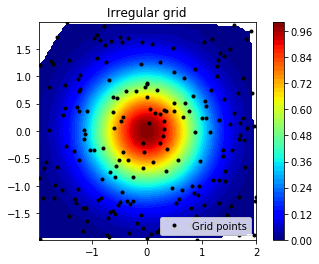

In [1]:
"""
Gridding: Generate and plot irregular grids (scatter)
"""
from fatiando import gridder, utils
from fatiando.vis import mpl

# Generate random points
x, y = gridder.scatter((-2, 2, -2, 2), n=200)
# And calculate a 2D Gaussian on these points
z = utils.gaussian2d(x, y, 1, 1)

mpl.axis('scaled')
mpl.title("Irregular grid")
mpl.plot(x, y, '.k', label='Grid points')
# Make a filled contour plot and tell the function to automatically interpolate
# the data on a 100x100 grid
mpl.contourf(x, y, z, (100, 100), 50, interp=True)
mpl.colorbar()
mpl.legend(loc='lower right', numpoints=1)
mpl.show()

C:\Users\windows\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'picker'
  s)


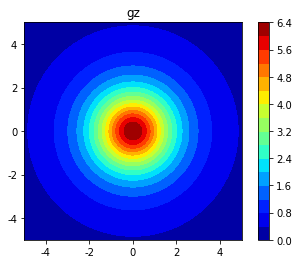

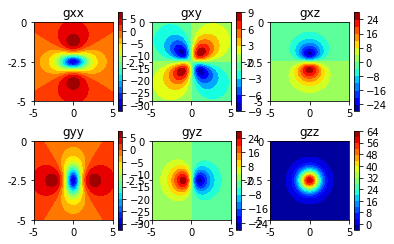

In [4]:
"""
GravMag: Forward modeling of the gravity anomaly and gravity gradient tensor
using model
"""
from fatiando import mesher, gridder
from fatiando.gravmag import sphere
from fatiando.vis import mpl

model = [mesher.Sphere(0, 0, 2000, 1000, {'density': 1000})]
area = (-5000, 5000, -5000, 5000)
shape = (100, 100)
x, y, z = gridder.regular(area, shape, z=-100)
gz = sphere.gz(x, y, z, model)
tensor = [sphere.gxx(x, y, z, model),
          sphere.gxy(x, y, z, model),
          sphere.gxz(x, y, z, model),
          sphere.gyy(x, y, z, model),
          sphere.gyz(x, y, z, model),
          sphere.gzz(x, y, z, model)]
mpl.figure()
mpl.axis('scaled')
mpl.title('gz')
mpl.contourf(y, x, gz, shape, 15)
mpl.colorbar()
mpl.m2km()
mpl.figure()
titles = ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz']
for i, field in enumerate(tensor):
    mpl.subplot(2, 3, i + 1)
    mpl.axis('scaled')
    mpl.title(titles[i])
    levels = mpl.contourf(y, x, field, shape, 15)
    mpl.colorbar()
    mpl.m2km()
mpl.show()

In [5]:
"""
Seismic: plotting a seismic section from a SEGY

Uses ObsPy package for SEGY file reading
You can find instructions for installing Obspy at http://obspy.org/

"""
from fatiando.vis import mpl
from obspy.segy import segy
import urllib
import numpy as np

# fetch sample SEGY data, near-offset marmousi data
url = "http://dl.dropboxusercontent.com/" \
      "s/i287ci4ww3w7gdt/marmousi_nearoffset.segy"
urllib.urlretrieve(url, 'marmousi_nearoffset.segy')
# We'll use the ObsPy library to load the SEGY data"
segyfile = segy.readSEGY('marmousi_nearoffset.segy')
# turn ObsPy Stream in a matrix of traces
# first dimension time, second dimension traces
ntraces = len(segyfile.traces)
nsamples = len(segyfile.traces[0].data)
mtraces = np.zeros((nsamples, ntraces))
i = 0
for tr in segyfile.traces:
    mtraces[:, i] = tr.data[:]
    i += 1
# make plots
mpl.figure()
mpl.subplot(2, 1, 1)
mpl.ylabel('time (seconds)')
mpl.title("Seismic wiggle plot", fontsize=13, family='sans-serif',
          weight='bold')
# plot using wiggle
mpl.seismic_wiggle(mtraces, scale=10**-4)
mpl.subplot(2, 1, 2)
mpl.ylabel('time (seconds)')
mpl.title("Seismic image plot", fontsize=13, family='sans-serif',
          weight='bold')
# plot using image
mpl.seismic_image(mtraces, aspect='auto')
mpl.show()

ModuleNotFoundError: No module named 'obspy'